In [ ]:
import keras
from keras.datasets import mnist
from mnist import MNIST
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop, Adam
from keras.models import load_model
from matplotlib.pyplot import imshow
from google.colab import files
from sklearn.model_selection import train_test_split
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback

tbc=TensorBoardColab()

batch_size = 128
num_classes = 62
epochs = 10


Using TensorFlow backend.


Wait for 8 seconds...
TensorBoard link:
https://a99339ce.ngrok.io


In [ ]:
# pip install python-mnist  ##handle no module MNIST 

In [ ]:
# !pip install tensorflow-gpu==1.15

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
from tensorflow.python.compiler.tensorrt import trt_convert as trt




In [ ]:
# the data, split between train and test sets
 # Read all EMNIST test and train data
mndata = MNIST('/content/drive/My Drive/200g/gzip/')

x_train, y_train = mndata.load('/content/drive/My Drive/200g/gzip/emnist-byclass-train-images-idx3-ubyte', 
                               '/content/drive/My Drive/200g/gzip/emnist-byclass-train-labels-idx1-ubyte')
x_test, y_test = mndata.load('/content/drive/My Drive/200g/gzip/emnist-byclass-test-images-idx3-ubyte', 
                             '/content/drive/My Drive/200g/gzip/emnist-byclass-test-labels-idx1-ubyte')

#(x_train, y_train), (x_test, y_test) = mnist.load_data()
#print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


In [ ]:
    # Read mapping of the labels and convert ASCII values to chars
    mapping = []

    with open('/content/drive/My Drive/200g/gzip/emnist-byclass-mapping.txt') as f:
        for line in f:
            mapping.append(chr(int(line.split()[1])))

    x_train = np.array(x_train) / 255.0
    y_train = np.array(y_train)
    x_test = np.array(x_test) / 255.0
    y_test = np.array(y_test)


In [ ]:
#Reshaping all images into 28*28 for pre-processing
x_train = x_train.reshape(x_train.shape[0], 28, 28)
x_test = x_test.reshape(x_test.shape[0], 28, 28)

<function matplotlib.pyplot.show>

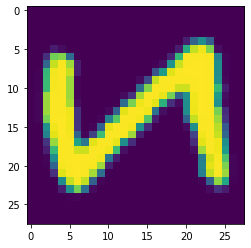

In [ ]:
#imshow(x_train[6])
#Display a random image
plt.imshow(x_train[0])
plt.show

# **reverse and rotate all train and test images**

<function matplotlib.pyplot.show>

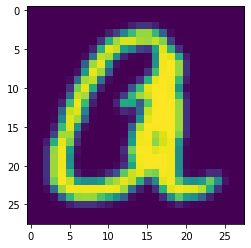

In [ ]:
#for train data
for t in range(697932):
    x_train[t]=np.transpose(x_train[t])
    
#checking
plt.imshow(x_train[0])
plt.show

#for test data  
for t in range(116323):
    x_test[t]=np.transpose(x_test[t])

#checking
plt.imshow(x_test[1])
plt.show

In [ ]:
#Reshaping train and test data again for input into model
x_train = x_train.reshape(x_train.shape[0], 784,1)
x_test = x_test.reshape(x_test.shape[0], 784,1)

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# x_train /= 255.0
# x_test /= 255.0
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


697932 train samples
116323 test samples


In [ ]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Reshape, LSTM
from keras import backend as K
import tensorflow as tf
# import keras.backend.tensorflow_backend as tfback
from keras.constraints import maxnorm
def resh(ipar):
    opar = []
    for image in ipar:
        opar.append(image.reshape(-1))
    return np.asarray(opar)

from keras.utils import np_utils

train_images = x_train
test_images = x_test

train_images = resh(train_images)
test_images = resh(test_images)

train_labels = np_utils.to_categorical(y_train, 62)
test_labels = np_utils.to_categorical(y_test, 62)


K.set_learning_phase(1)


In [ ]:
# from keras import backend as K
# tfback._get_available_gpus()
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# **build model**

In [ ]:
# partition to train and val
# train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size= 0.10, random_state=7)

In [ ]:
model = Sequential()

model.add(Reshape((28,28,1), input_shape=(784,)))

model.add(Convolution2D(32, (5,5), input_shape=(28,28,1),
                             activation='relu',padding='same',
                            kernel_constraint=maxnorm(3)))
model.add(Convolution2D(32, (5,5),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(62, activation='softmax'))
opt = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
# opt = optimizers.Adadelta()
# opt = optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              4719616   
______________________________________

In [ ]:

# y_test.shape
# train_images.shape
train_images.shape[:1]

(697932,)

In [ ]:
history = model.fit(train_images,train_labels,validation_data=(test_images, test_labels), batch_size=batch_size, epochs=epochs, verbose=1)


Train on 697932 samples, validate on 116323 samples
Epoch 1/10
697932/697932 [==============================] - 69s 99us/step - loss: 0.4902 - accuracy: 0.8326 - val_loss: 0.4125 - val_accuracy: 0.8527
Epoch 2/10
697932/697932 [==============================] - 60s 85us/step - loss: 0.3935 - accuracy: 0.8575 - val_loss: 0.3903 - val_accuracy: 0.8574
Epoch 3/10
697932/697932 [==============================] - 46s 66us/step - loss: 0.3767 - accuracy: 0.8617 - val_loss: 0.3825 - val_accuracy: 0.8614
Epoch 4/10
697932/697932 [==============================] - 47s 67us/step - loss: 0.3671 - accuracy: 0.8649 - val_loss: 0.3756 - val_accuracy: 0.8626
Epoch 5/10
697932/697932 [==============================] - 46s 66us/step - loss: 0.3610 - accuracy: 0.8667 - val_loss: 0.3800 - val_accuracy: 0.8618
Epoch 6/10
697932/697932 [==============================] - 68s 98us/step - loss: 0.3565 - accuracy: 0.8678 - val_loss: 0.3703 - val_accuracy: 0.8642
Epoch 7/10
697932/697932 [=====================

In [ ]:
# plot accuracy and loss
def plotgraph(epochs, acc, val_acc):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title('Model accuracy')
    plt.ylabel('loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

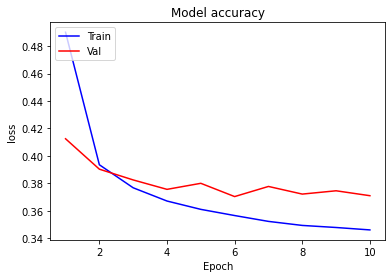

In [ ]:
# Accuracy curve
plotgraph(epochs, loss, val_loss)

In [ ]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.3717941777560654
Test accuracy: 0.8651341795921326


In [ ]:
# result = model.predict(x_test)
# print(result.shape)
# print(result[100])
# (x_train2, y_train2), (x_test2, y_test2) = mnist.load_data()
# imshow(x_test2[100])


# **Confusion Matrix**

In [ ]:

test_predictions = model.predict_classes(test_images)

# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_true = y_test, y_pred = test_predictions)
# print(cm)

import pandas as pd 
pd.crosstab(y_test, test_predictions, rownames=['實際值'], colnames=['預測值'])

預測值,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
實際值,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,4765,0,3,0,4,0,9,0,6,1,0,5,6,60,0,1,0,0,0,0,0,0,0,0,879,0,13,0,0,0,10,0,0,0,0,0,5,3,0,1,0,0,0,0,0,0,0,0,0,3,3,1,0,0,0,0,0,0,0,0,0,0
1,1,5981,1,0,0,1,0,3,0,0,0,0,0,0,0,1,0,0,165,0,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,2,0,153,0,2,0,0,0,0,0,3,0,0,0,0,0,0
2,2,5,5758,9,0,1,1,5,5,0,0,0,0,1,0,0,0,0,0,2,0,8,0,1,2,0,4,0,1,0,0,1,0,0,0,10,8,0,0,4,0,0,2,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,36
3,0,0,6,5921,0,5,0,3,1,2,0,8,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,9,0,0,0,0,0,1,0,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
4,0,3,0,0,5499,0,3,1,0,19,8,0,0,0,0,1,0,15,0,0,0,0,2,0,0,0,0,0,0,0,9,1,0,0,28,0,3,0,0,1,0,0,2,2,0,1,0,0,0,0,0,0,1,1,0,10,2,0,0,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,0,0,0,0,0,27,226,0,0,6,0,0,0,0,0,0,0,0,0,1,3,0,0,0,1,0,0,0,5,0,0,0,187,1,0,6,0
58,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,3,0,0,0,0,1,0,0,0,114,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,342,0,0,0
59,0,0,3,0,4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,69,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,376,4,1


In [ ]:
model.save('emnist_keras_dnn_Ian.h5')

In [ ]:
!ls -al

total 62208
drwxr-xr-x 1 root root     4096 Apr 14 02:31 .
drwxr-xr-x 1 root root     4096 Apr 14 01:48 ..
drwxr-xr-x 1 root root     4096 Apr  9 16:10 .config
drwx------ 5 root root     4096 Apr 14 01:55 drive
-rw-r--r-- 1 root root 63677856 Apr 14 04:29 emnist_keras_dnn_Ian.h5
drwxr-xr-x 1 root root     4096 Apr  3 16:24 sample_data
